# Lab2
## Ex1to4

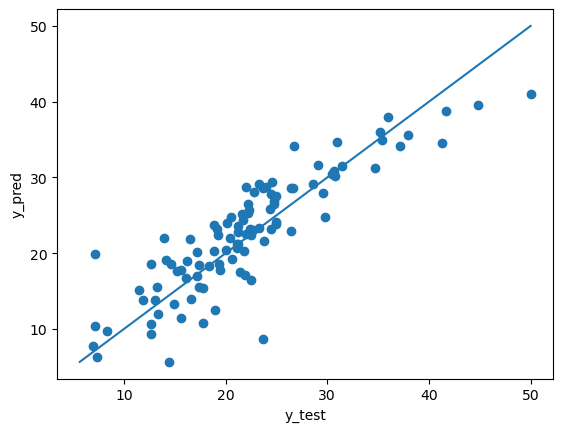

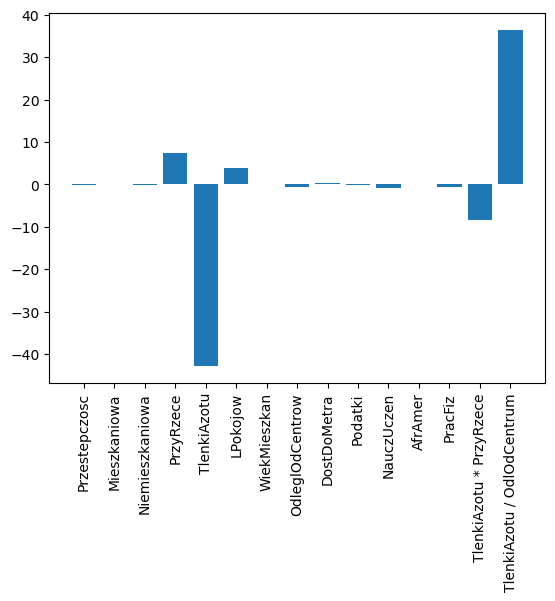

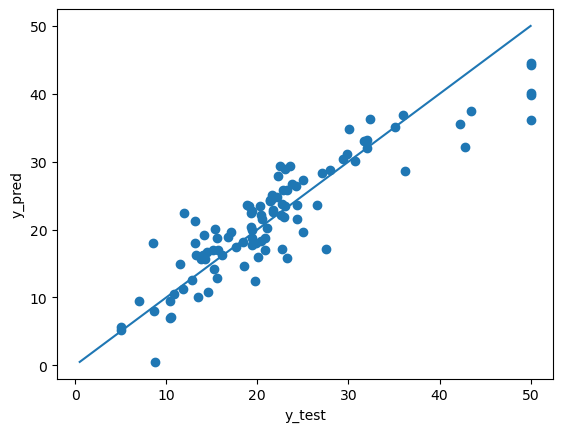

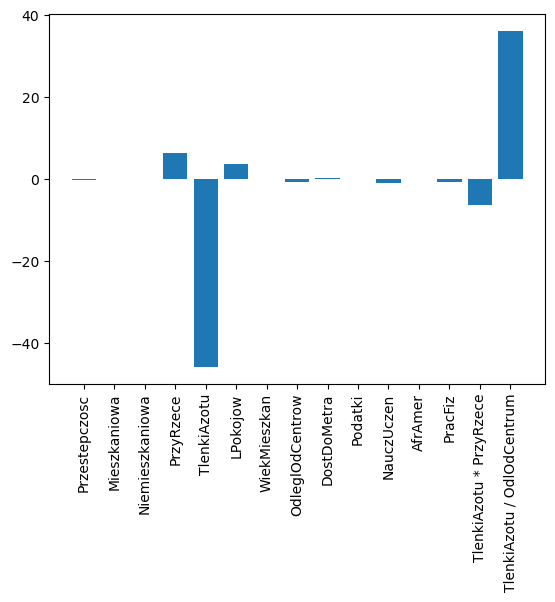

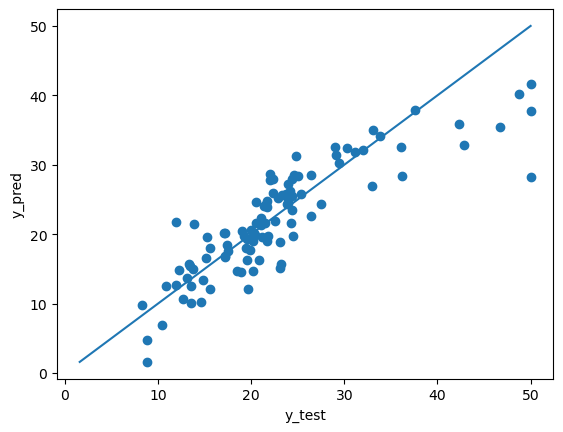

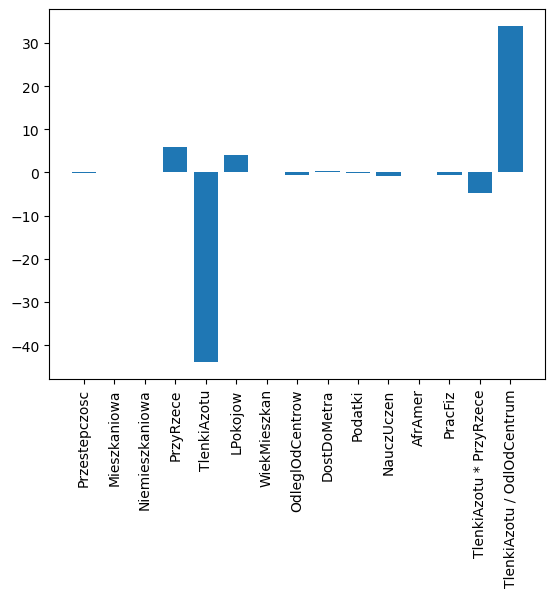

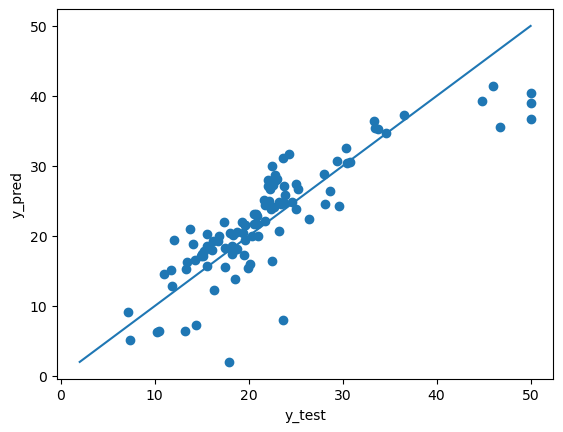

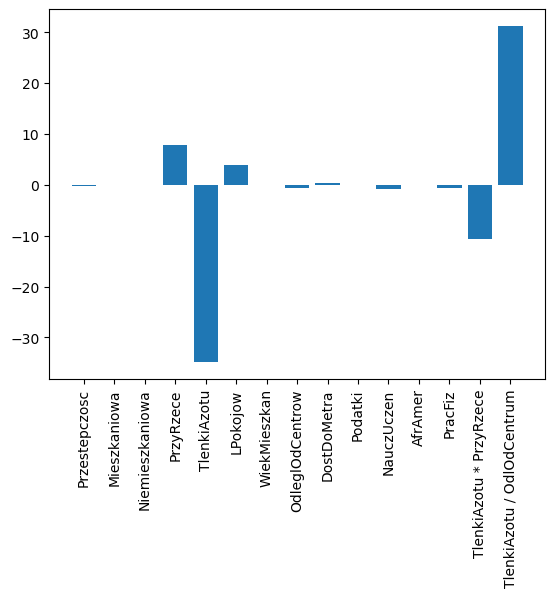

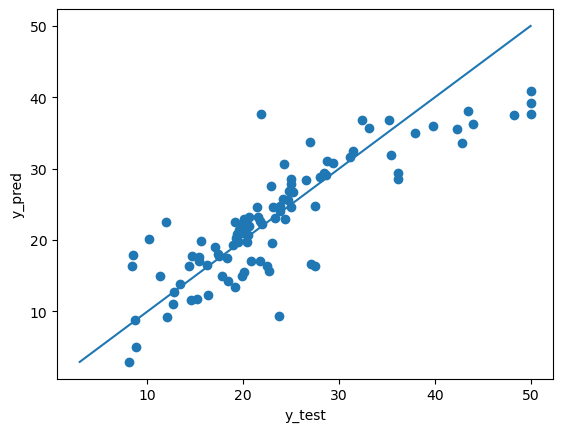

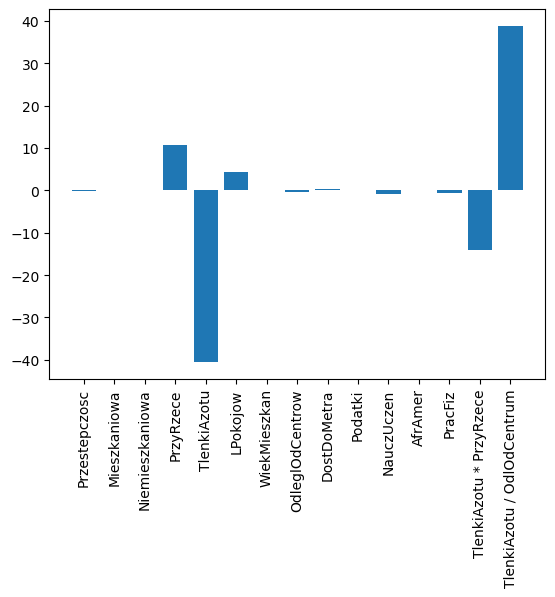

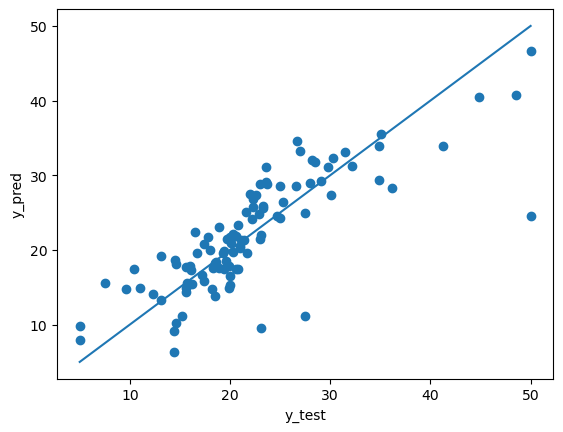

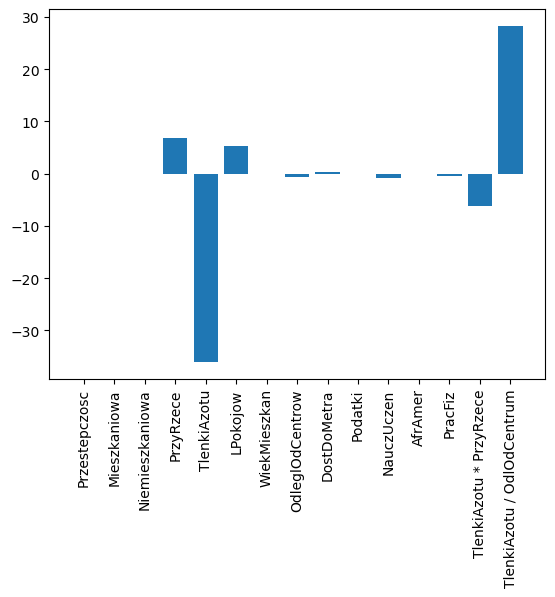

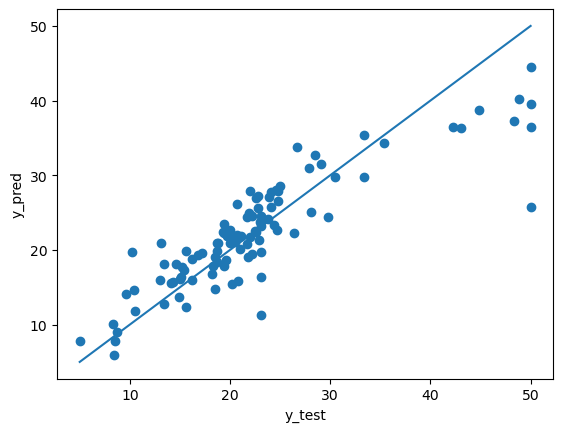

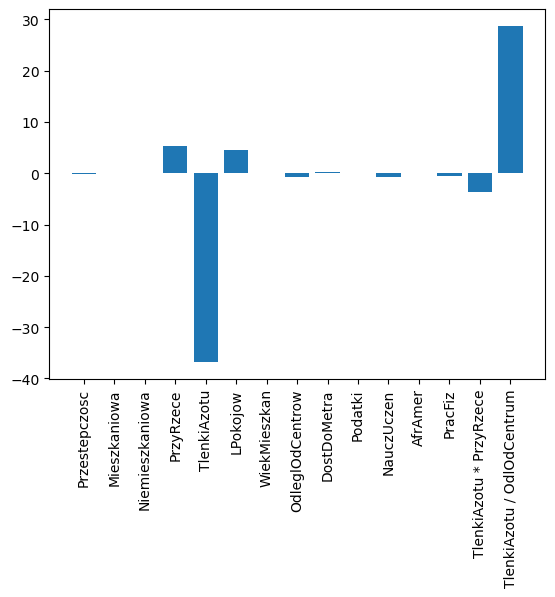

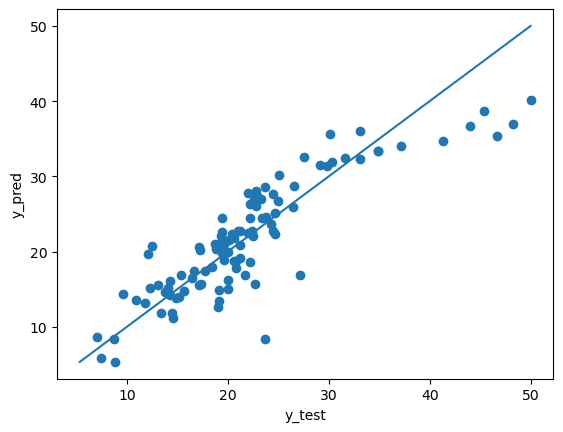

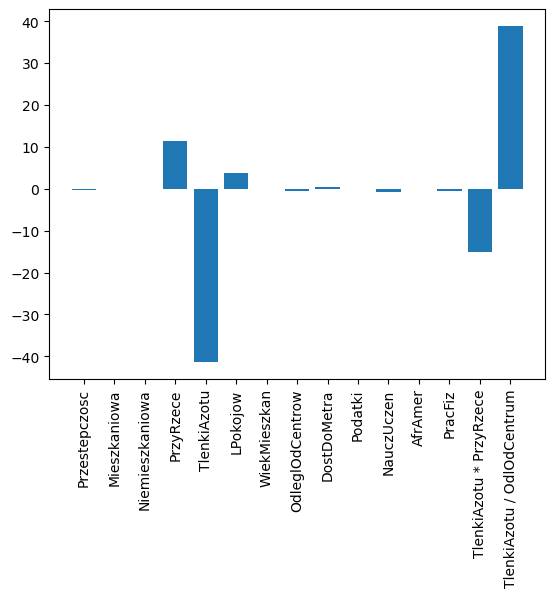

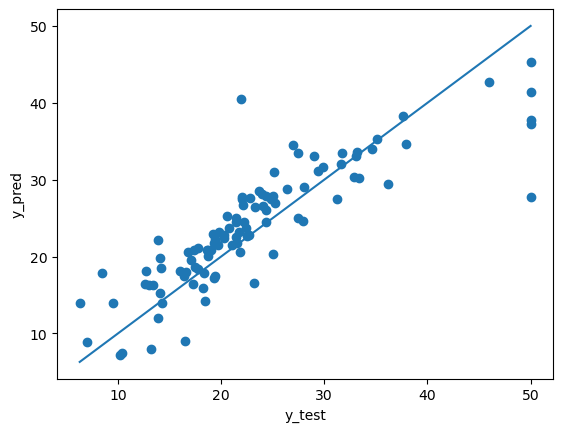

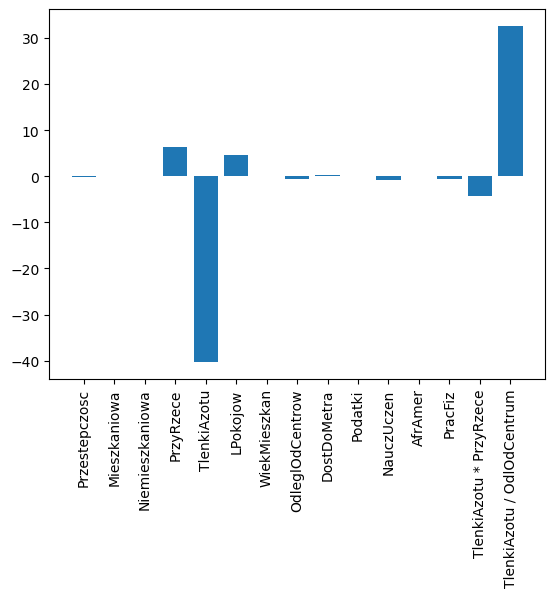

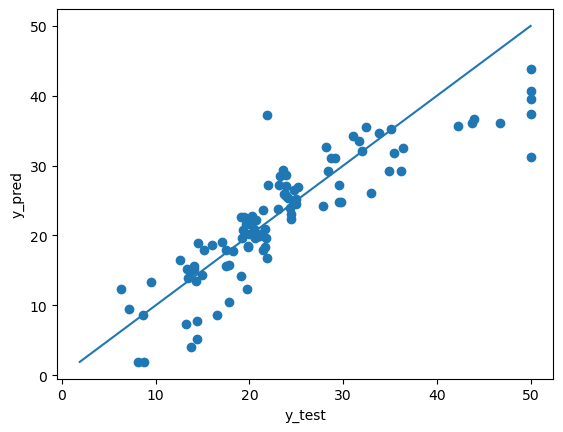

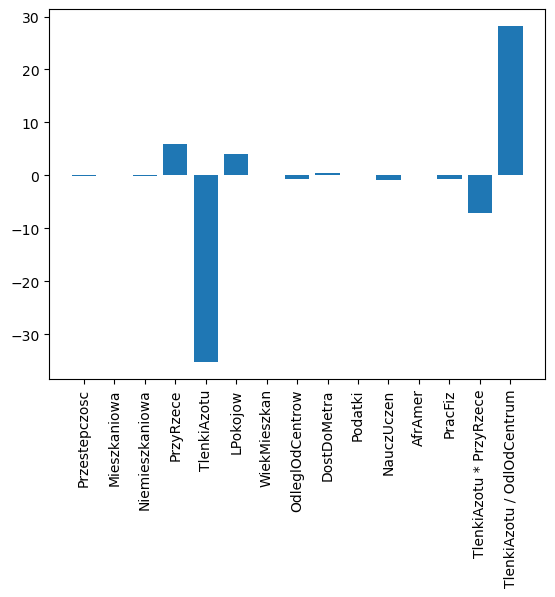

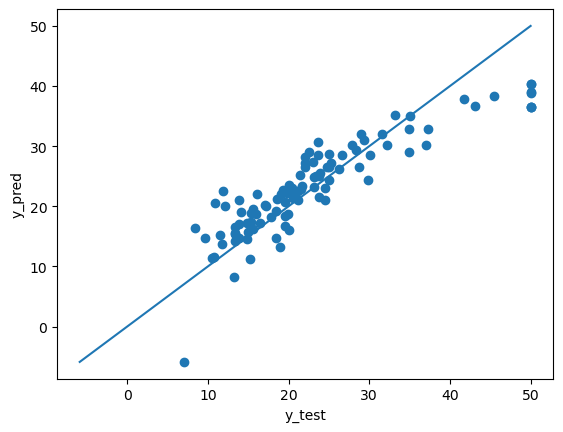

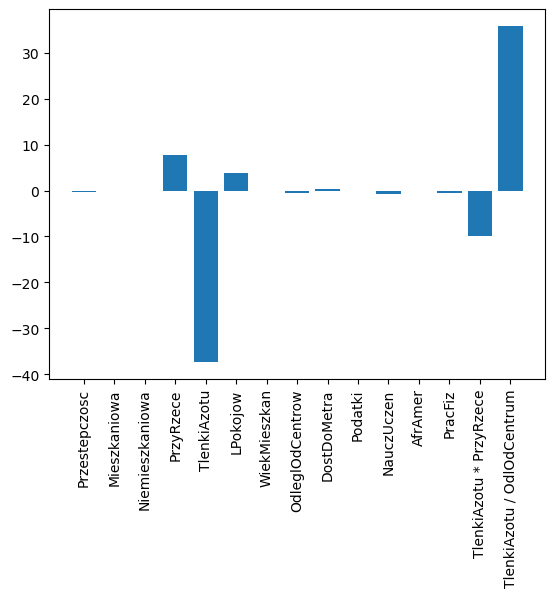

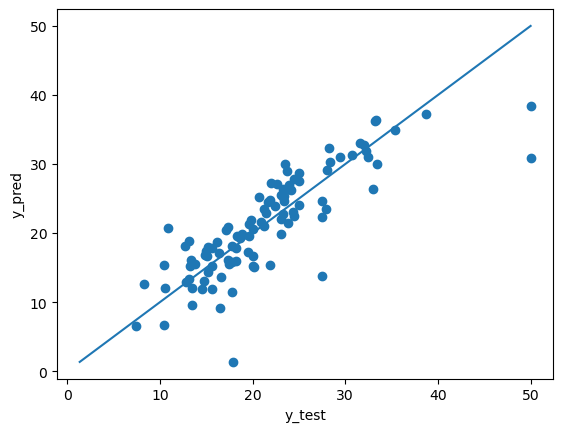

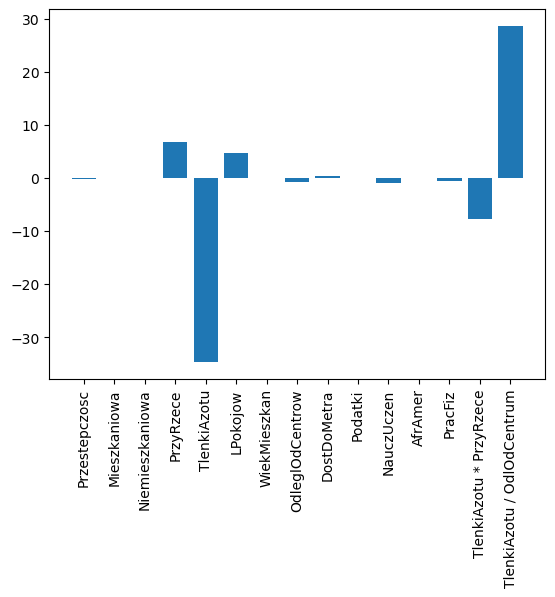

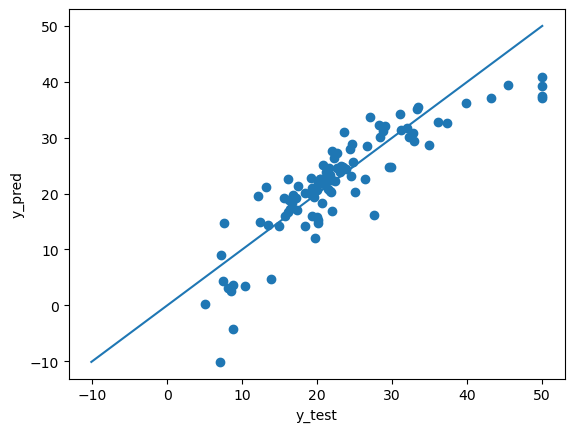

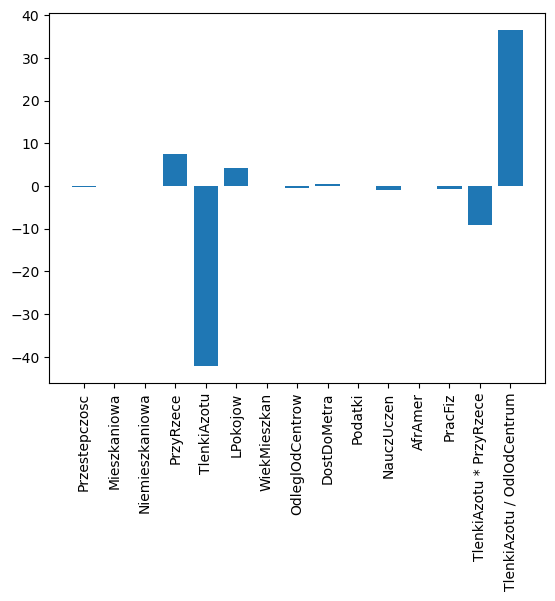

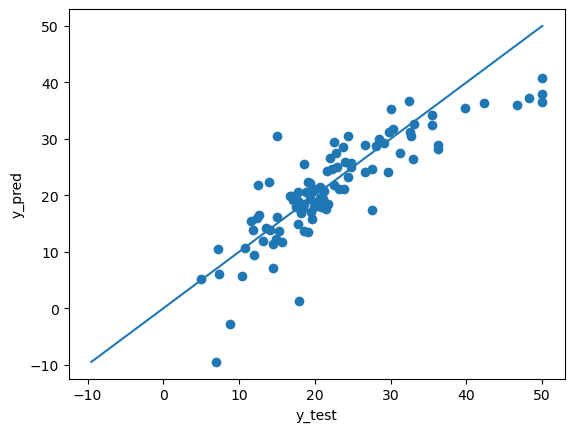

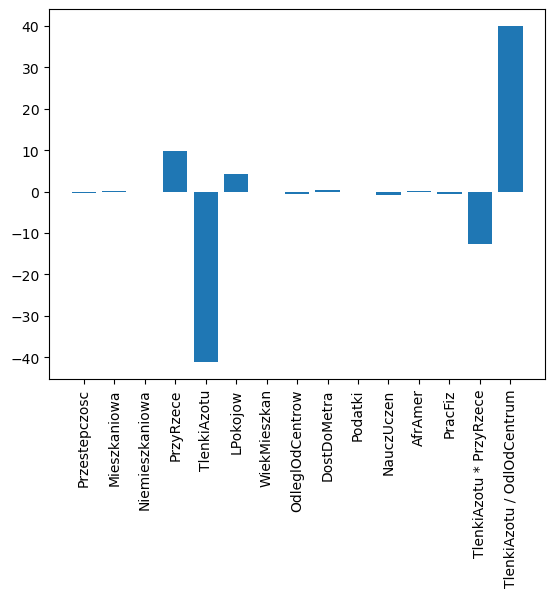

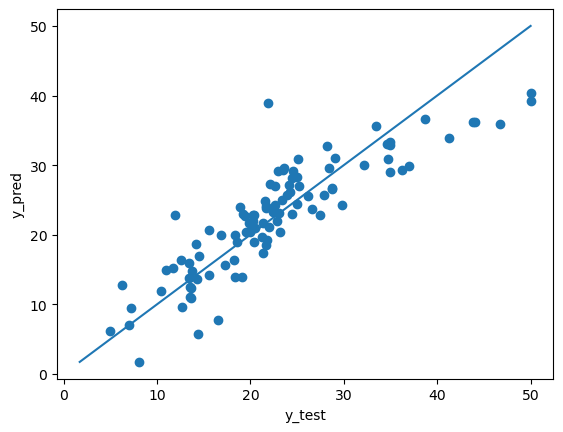

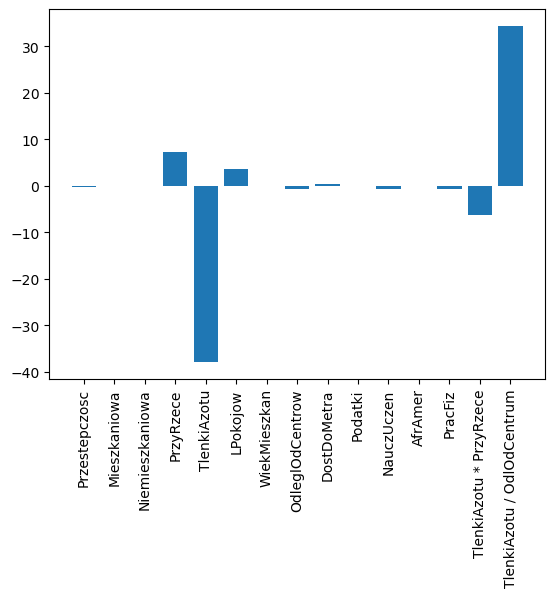

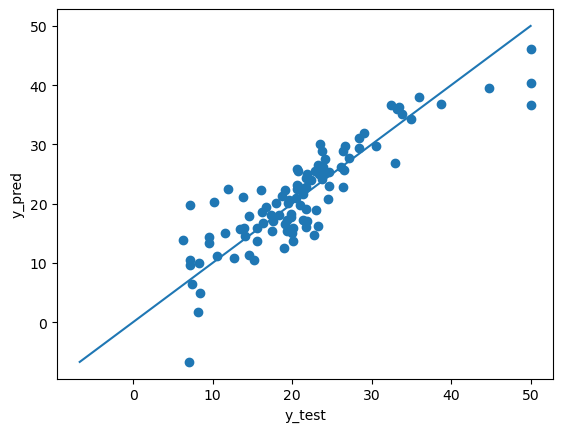

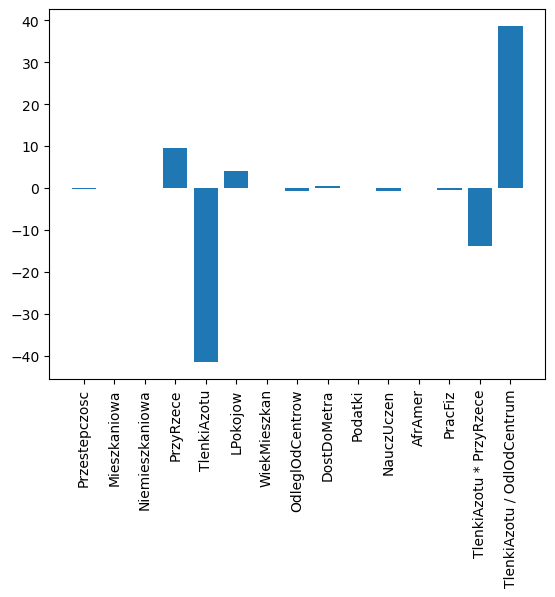

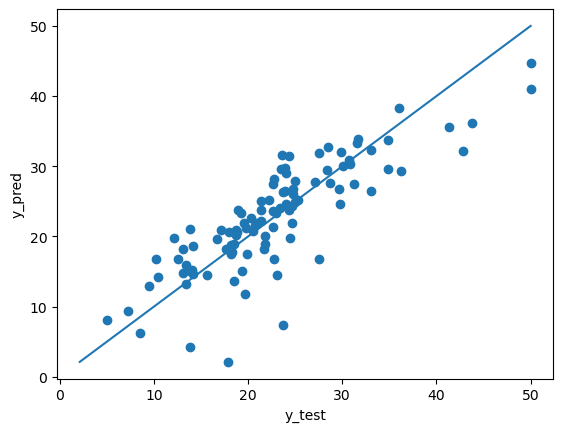

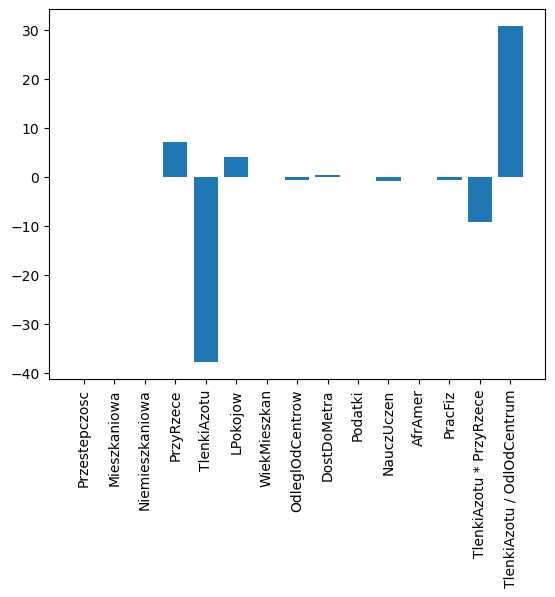

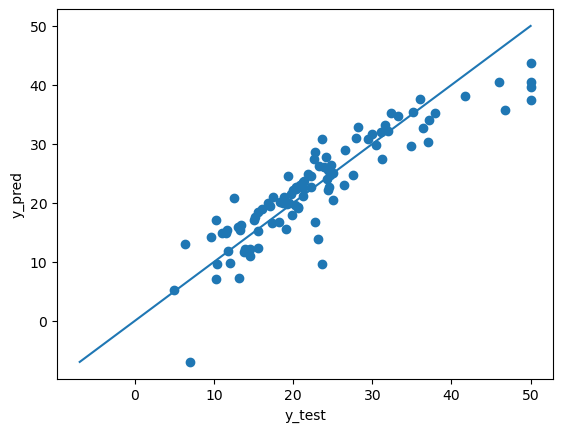

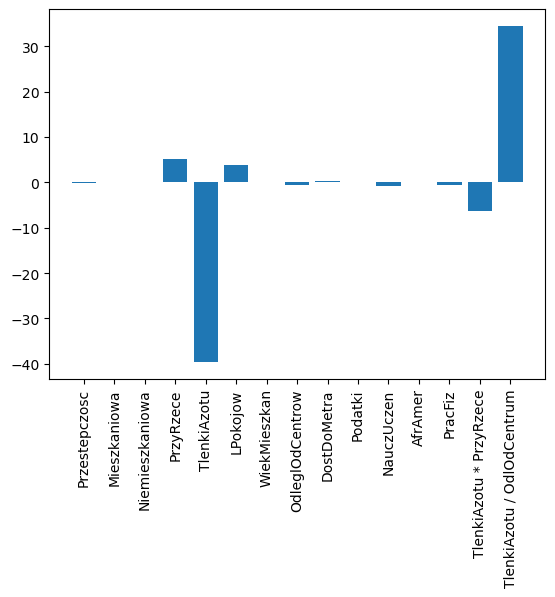

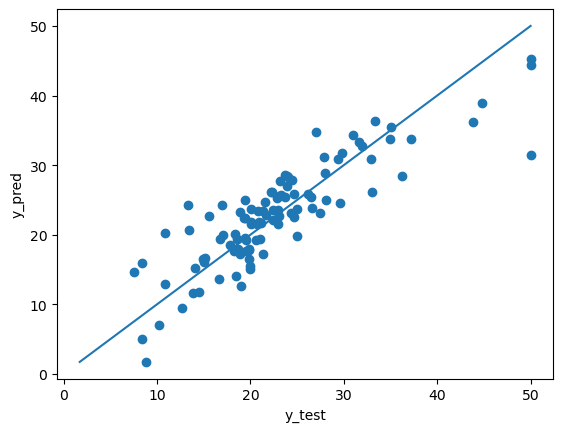

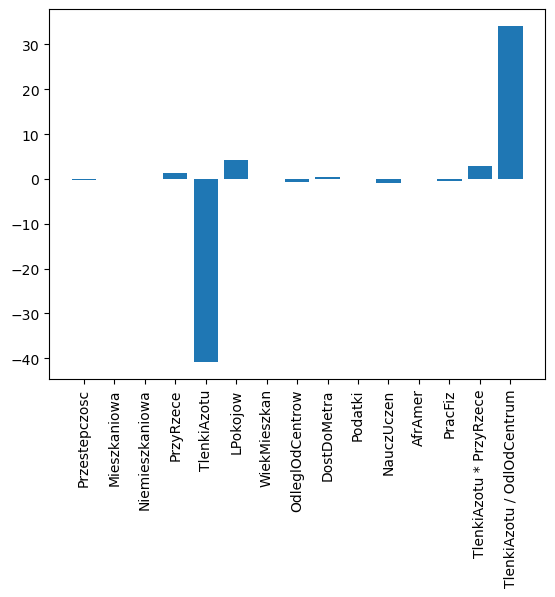

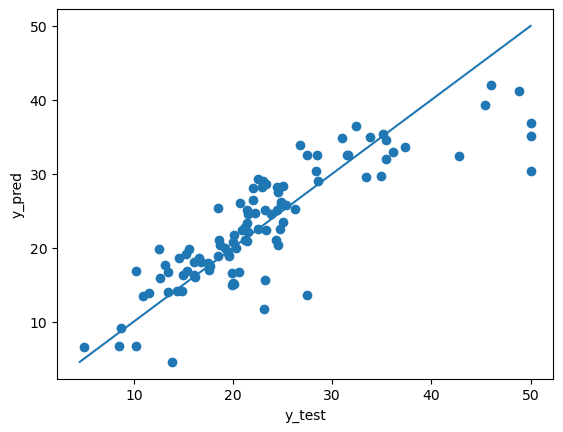

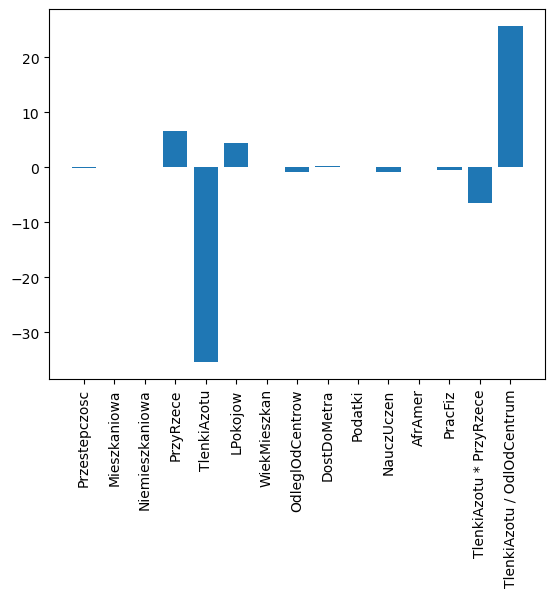

Adding extra attributes: Mean mape: 0.17376892762496732 for 20 tests


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

data_excel = pd.read_excel("practice_lab_2.xlsx",engine="openpyxl")
data = data_excel.values
data_columns_names = list(data_excel.columns)

# EX 1
def ex1():
    correlation = data_excel.corr()
    fig, ax = plt.subplots(13,1,figsize=(10,35))
    
    for i in range(13):
        y1 = data[:,13]
        y2 = data[:,i]
        
        ax[i].scatter(y1,y2)
        ax[i].set_title(data_columns_names[i])
    fig.tight_layout()    

# EX 2
def test(repeats):
    total_mape = 0
    for i in range(repeats):
    
        X, y = data[:,:-1], data[:,-1]
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)
        linReg = LinearRegression()
        linReg.fit(X_train, y_train)
        y_pred = linReg.predict(X_test)
        
        minval = min(y_test.min(), y_pred.min())
        maxval = max(y_test.max(),y_pred.max())
        plt.scatter(y_test,y_pred)
        plt.plot([minval,maxval],[minval,maxval])
        plt.xlabel('y_test')
        plt.ylabel('y_pred')
        plt.show()
        
        mape = mean_absolute_percentage_error (y_test, y_pred)
        total_mape += mape
        print(mape)
        
    return (total_mape/repeats,repeats)

def createBoxChart():
    global X
    X = data[:,:-1]
    global y
    y = data[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
    plt.boxplot(y_train)
    plt.title("Medianowa wartość mieszkania")
    global igrek
    igrek = y_train
    global outliers
    outliers = np.abs((y_train - y_train.mean())/y_train.std())>2
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    global y_mean 
    y_train_mean = y_train.copy()
    y_train_mean[outliers] = y_train.mean()
    
    ax[0].boxplot(y_train)
    ax[1].boxplot(y_train_mean)

def removeOutliers(repeats):
    totalMape = 0
    X = data[:,:-1]
    y = data[:,-1]
    
    for i in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
        
        outliers = np.abs((y_train - y_train.mean())/y_train.std())>2
        X_train_no_outliers = X_train[~outliers,:]
        y_train_no_outliers = y_train[~outliers]
        
        linReg = LinearRegression()
        linReg.fit(X_train_no_outliers,y_train_no_outliers)
        y_pred = linReg.predict(X_test)
        
        minval = min(y_test.min(),y_pred.min())
        maxval = max(y_test.max(),y_pred.max())
        plt.scatter(y_test,y_pred)
        plt.plot([minval,maxval],[minval,maxval])
        plt.xlabel("y_test")
        plt.ylabel("y_pred")
        plt.show()
        
        totalMape += mean_absolute_percentage_error(y_test, y_pred)
    
    meanMape = totalMape/repeats
    return (meanMape,repeats)
        
        

#EX 3
def replaceOutliers(repeats):
    total_mape = 0
    X = data[:,:-1]
    y = data[:,-1]
    weights_names = data_columns_names[:-1]
    
    for i in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
        
        outliers = np.abs((y_train - y_train.mean())/y_train.std())>2
        y_train_mean = y_train.copy()
        y_train_mean[outliers] = y_train.mean()
        
        linReg = LinearRegression()
        linReg.fit(X_train,y_train_mean)
        y_pred = linReg.predict(X_test)
        
        minval = min(y_test.min(),y_pred.min())
        maxval = max(y_test.max(),y_pred.max())
        #plt.scatter(y_test, y_pred)
        #plt.plot([minval,maxval],[minval,maxval])
        #plt.xlabel("y_test")
        #plt.ylabel("y_pred")
        #plt.show()
        
        
        x = np.arange(len(weights_names))
        weights = linReg.coef_
        plt.bar(weights_names,weights)
        plt.xticks(weights_names,rotation='vertical')
        plt.show()
        
        
        total_mape += mean_absolute_percentage_error(y_test, y_pred)
    mean_mape = total_mape/repeats
    return (mean_mape,repeats)

def addExtraData(repeats):
    total_mape = 0
    X = data[:,:-1]
    y = data[:,-1]
    weights_names = data_columns_names[:-1]
    
    global extra_data
    extra_data = np.stack([
        X[:,4] * X[:,3],
        X[:,4] / X[:,7]
        ],axis=-1)
    
    global X_additional
    X = np.concatenate([X,extra_data],axis=-1)
    
    extra_names = np.stack([
        "TlenkiAzotu * PrzyRzece",
        "TlenkiAzotu / OdlOdCentrum"
        ])
    global weights_names_additional
    weights_names = np.concatenate([weights_names,extra_names],axis=0)
    
    for i in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
        
        
        linReg = LinearRegression()
        linReg.fit(X_train,y_train)
        y_pred = linReg.predict(X_test)
        
        minval = min(y_test.min(),y_pred.min())
        maxval = max(y_test.max(),y_pred.max())
        plt.scatter(y_test, y_pred)
        plt.plot([minval,maxval],[minval,maxval])
        plt.xlabel("y_test")
        plt.ylabel("y_pred")
        plt.show()
        
        x = np.arange(len(weights_names))
        weights = linReg.coef_
        plt.bar(weights_names,weights)
        plt.xticks(weights_names,rotation='vertical')
        plt.show()
        
        
        total_mape += mean_absolute_percentage_error(y_test, y_pred)
    mean_mape = total_mape/repeats
    return (mean_mape,repeats)
        

#meanMape, repeats1 = test(20)
#print("Normal testing: Mean mape: {} for {} tests".format(meanMape,repeats1))
#meanMape2, repeats2 = replaceOutliers(20)
#print("Replacing outliers: Mean mape: {} for {} tests".format(meanMape2, repeats2))
#meanMape3, repeats3 = removeOutliers(20)
#print("Removing outliers: Mean mape: {} for {} tests".format(meanMape3, repeats3))

meanMape4, repeats4 = addExtraData(20)
print("Adding extra attributes: Mean mape: {} for {} tests".format(meanMape4, repeats4))

## Ex5

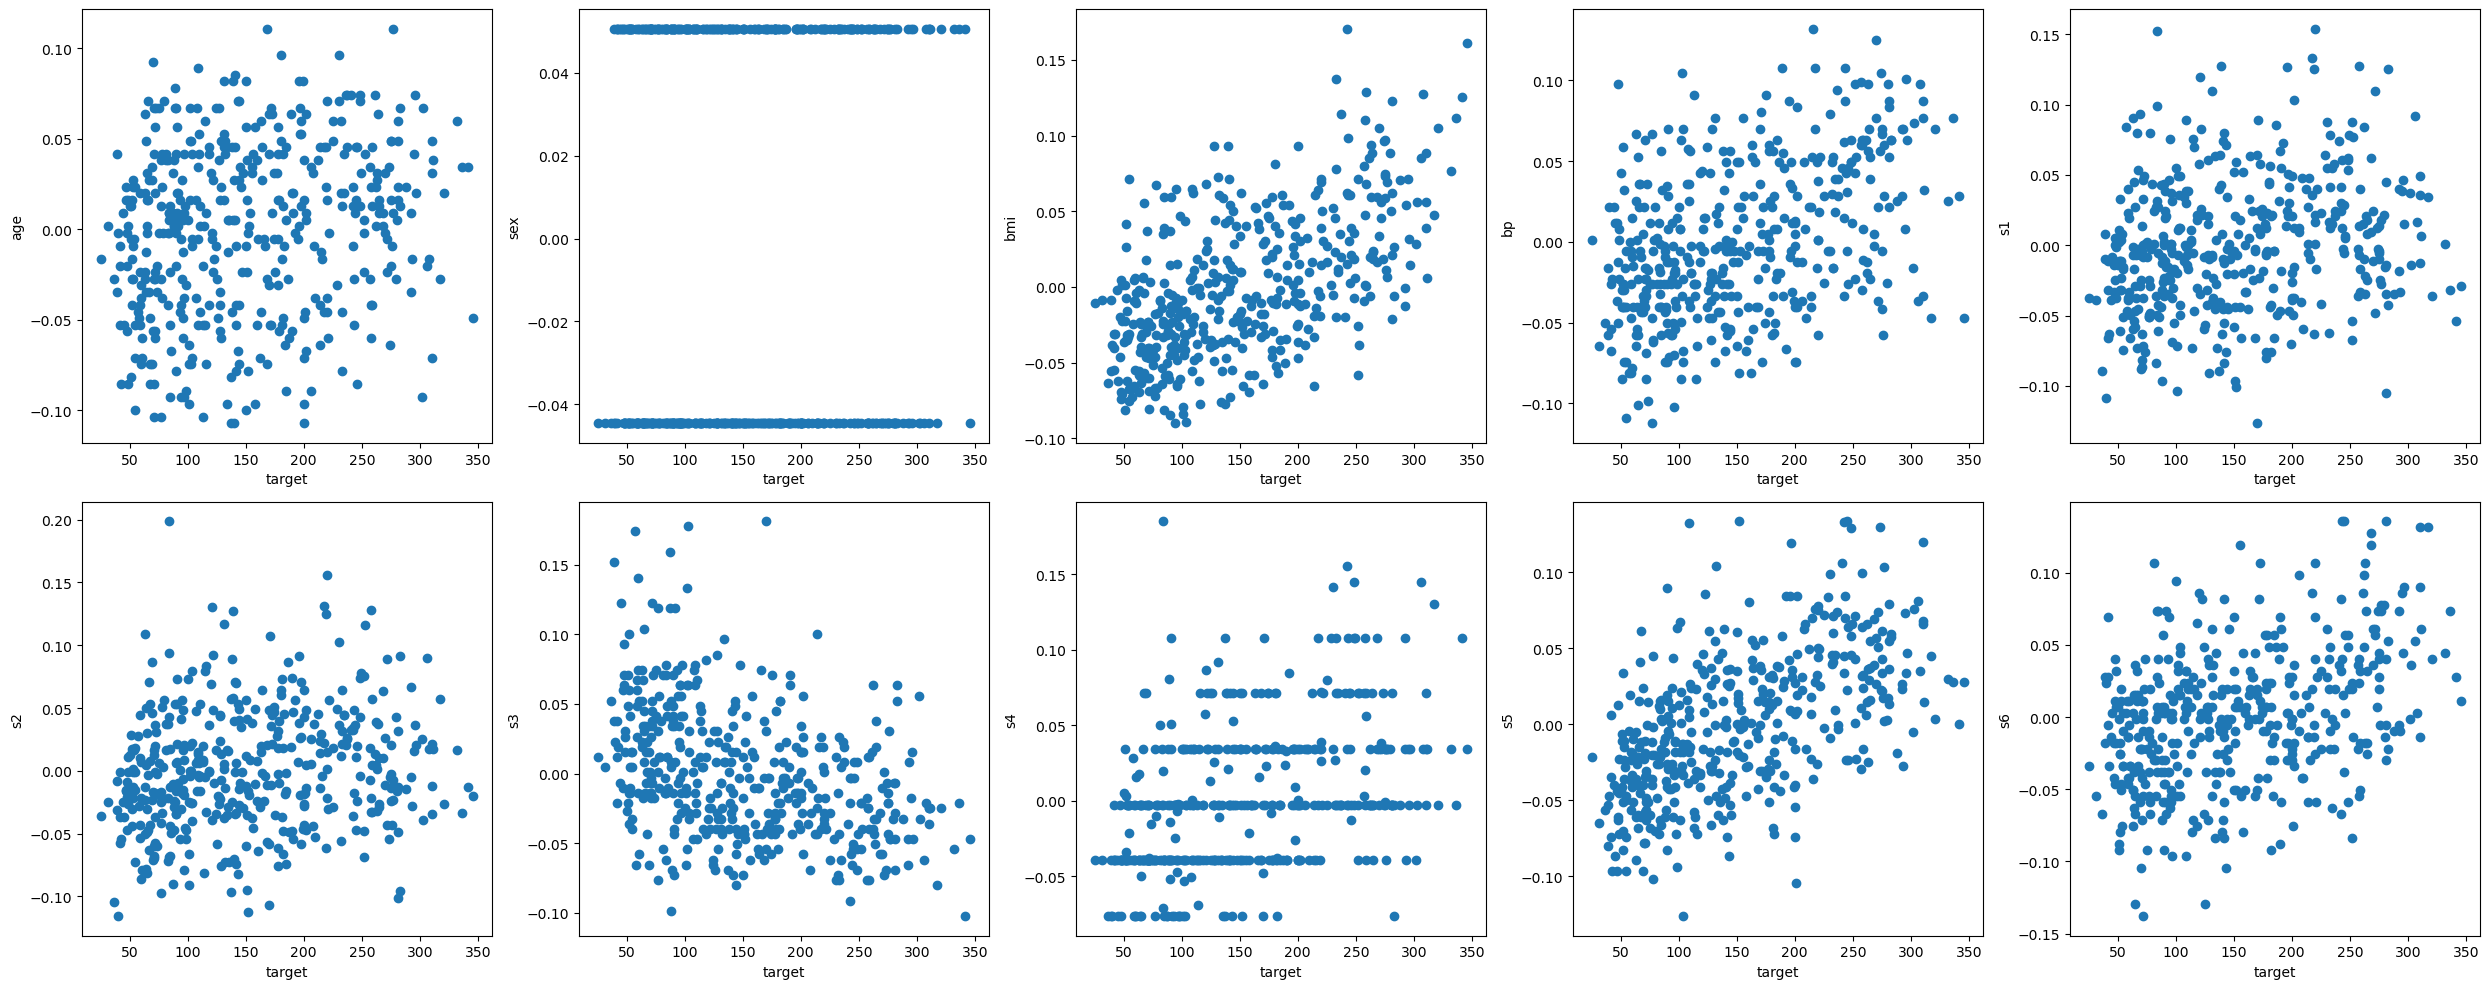

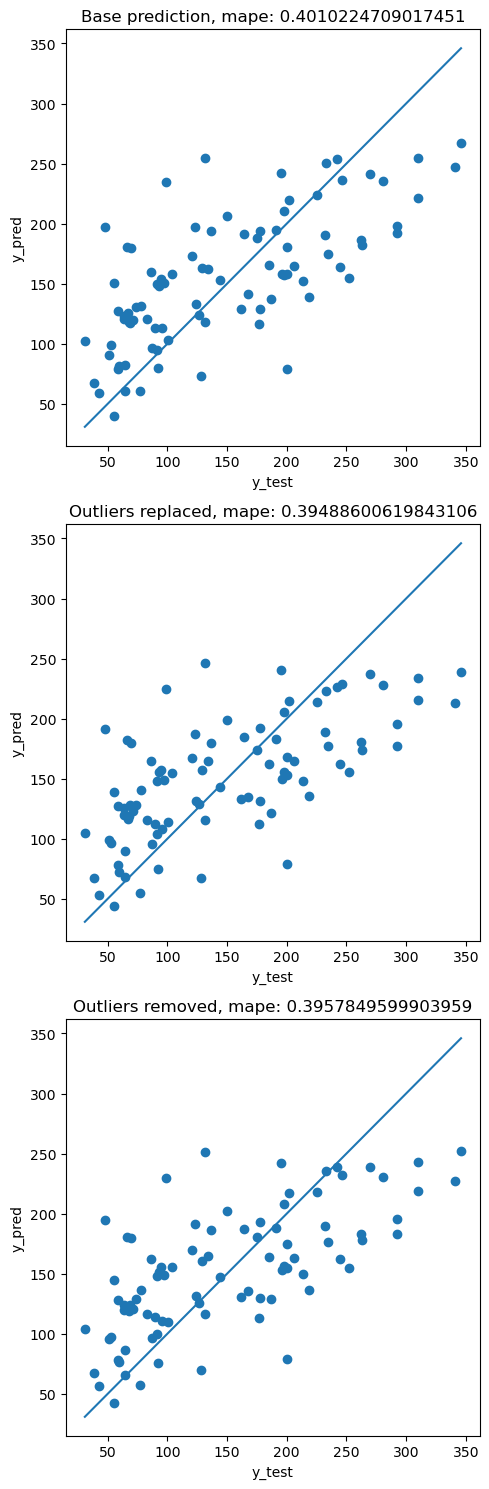

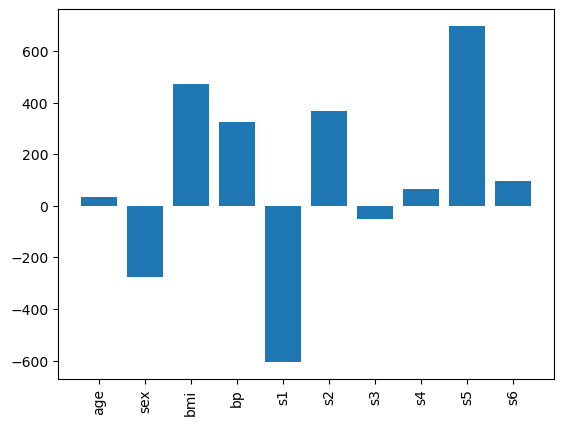

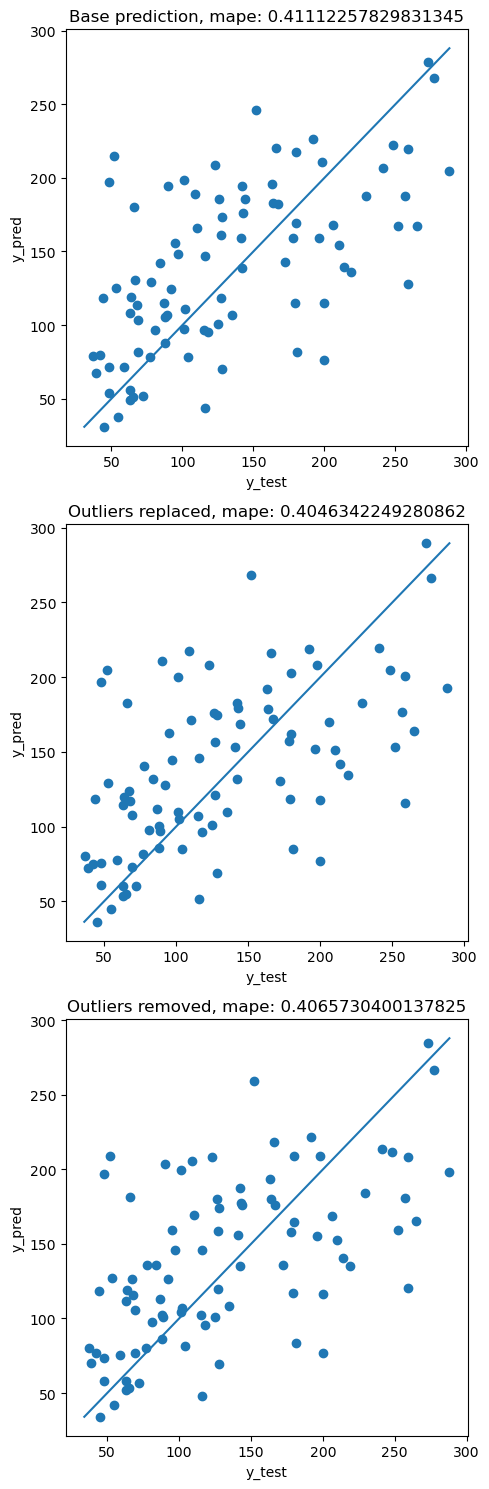

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

#READING DATA
raw_data = load_diabetes()
data_excel = pd.DataFrame(raw_data.data,columns=raw_data.feature_names)
data_excel['target'] = raw_data.target

data = np.array(data_excel.values)
data_columns = list(data_excel.columns)

#CORRELATION ANALIZE
corr = data_excel.corr()

fig, ax = plt.subplots(2,5,figsize=(25,10))
for i in range(10):
    attr = data[:,i]
    target = data[:,-1]
    
    ax[int(i/5)][i%5].scatter(target,attr)
    ax[int(i/5)][i%5].set_xlabel("target")
    ax[int(i/5)][i%5].set_ylabel(data_columns[i])
    fig.tight_layout()

#TRAINING LINEAR REGRESSION
#Method to generate chart of regression
def generateTestVsPredPlot(index,y_test,y_pred,title):
    minval = min(y_test.min(),y_pred.min())
    maxval = max(y_test.max(),y_pred.max())

    ax[index].plot([minval,maxval],[minval,maxval])
    ax[index].scatter(y_test,y_pred)
    ax[index].set_xlabel('y_test')
    ax[index].set_ylabel('y_pred')
    ax[index].set_title(title)
    
#Method to train and test values with different treatment of outliers
def runModel(X,y,repeats):
    #Export this variables to skip returning all this values as big tuple
    global y_test
    global y_pred_base
    global y_pred_mean
    global y_pred_no_outliers
    global mean_mape_base
    global mean_mape_mean
    global mean_mape_no_outliers
    
    mean_mape_base = 0
    mean_mape_mean = 0
    mean_mape_no_outliers = 0
    for i in range(repeats):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
        
        outliers = np.abs((y_train - y_train.mean())/y_train.std())>2   #Mask defining outliers
        
        y_train_mean = y_train.copy()
        y_train_mean[outliers] = y_train.mean() #Replacing outliers with mean value
        
        X_train_no_outliers = X_train[~outliers,:]  #Removing outliers
        y_train_no_outliers = y_train[~outliers] #Removing outliers
        
        linReg_base = LinearRegression()
        linReg_mean = LinearRegression()
        linReg_no_outliers = LinearRegression()
        
        linReg_base.fit(X_train,y_train)
        linReg_mean.fit(X_train,y_train_mean)
        linReg_no_outliers.fit(X_train_no_outliers,y_train_no_outliers)
        
        y_pred_base = linReg_base.predict(X_test)
        y_pred_mean = linReg_mean.predict(X_test)
        y_pred_no_outliers = linReg_no_outliers.predict(X_test)
        
        mean_mape_base += mean_absolute_percentage_error(y_test, y_pred_base)
        mean_mape_mean += mean_absolute_percentage_error(y_test, y_pred_mean)
        mean_mape_no_outliers += mean_absolute_percentage_error(y_test, y_pred_no_outliers)
    
    mean_mape_base /= repeats
    mean_mape_mean /= repeats
    mean_mape_no_outliers /= repeats

#Variables used through all testing
X = data[:,:-1]
y = data[:,-1]
repeats = 20

#Running and visualizing model
fig, ax = plt.subplots(3,1,figsize=(5,15)) 
runModel(X,y,repeats)

generateTestVsPredPlot(0,y_test, y_pred_base, 'Base prediction, mape: {}'.format(mean_mape_base))
generateTestVsPredPlot(1,y_test, y_pred_mean, 'Outliers replaced, mape: {}'.format(mean_mape_mean))
generateTestVsPredPlot(2,y_test, y_pred_no_outliers, 'Outliers removed, mape: {}'.format(mean_mape_no_outliers))

fig.tight_layout()
plt.show()

#ADDING EXTRA ATTRIBUTES
#Seeing weights
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
linReg = LinearRegression()
linReg.fit(X_train,y_train)
weights_names = data_columns[:-1]
weights = linReg.coef_
plt.bar(weights_names,weights)
plt.xticks(weights_names,rotation='vertical')
plt.show()

#Generating data
extra_data = np.stack([
    X[:,4] / X[:,5],
    X[:,4] / X[:,3],
    X[:,4] / X[:,2],
    X[:,4] / X[:,8]
    ],axis=-1)
X_extra = np.concatenate([X,extra_data],axis=-1)

#Running and visualizing model
fig, ax = plt.subplots(3,1,figsize=(5,15))  
runModel(X_extra,y,repeats)
generateTestVsPredPlot(0,y_test, y_pred_base, 'Base prediction, mape: {}'.format(mean_mape_base))
generateTestVsPredPlot(1,y_test, y_pred_mean, 'Outliers replaced, mape: {}'.format(mean_mape_mean))
generateTestVsPredPlot(2,y_test, y_pred_no_outliers, 'Outliers removed, mape: {}'.format(mean_mape_no_outliers))

fig.tight_layout()
plt.show()
